# GIS Scratchbook

## Geopandas Example

In [1]:
import geopandas
import rasterio
import pprint
from rasterio import features
import rasterio.plot
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
# Import raster file
currents = rasterio.open('data/Surface Currents.tif')

In [3]:
# Create sampling points
points = [Point(600000, 4400000), Point(400000, 4600000), Point(600000, 4600000)]
gdf = geopandas.GeoDataFrame(geometry=points, crs=32630)
gdf.head()

,geometry
0,POINT (600000.000 4400000.000)
1,POINT (400000.000 4600000.000)
2,POINT (600000.000 4600000.000)


In [4]:
point = [400000, 4400000, 32630]
gdf2 = geopandas.GeoDataFrame(["{}-{}".format(point[0], point[1])], geometry=[Point(point[0], point[1])], crs=point[2])
coord_list = [(point[0], point[1])]
gdf2['value'] = [x for x in currents.sample(coord_list)]
gdf = gdf.append(gdf2)
gdf

,geometry,0,value
0,POINT (600000.000 4400000.000),NaN,NaN
1,POINT (400000.000 4600000.000),NaN,NaN
2,POINT (600000.000 4600000.000),NaN,NaN
0,POINT (400000.000 4400000.000),400000-4400000,"[0.0742688, 181.08922]"


In [5]:
gdf[0]

0               NaN
1               NaN
2               NaN
0    400000-4400000
Name: 0, dtype: object

In [6]:
gdp = currents.sample([(400000, 4400000)])
gdp

<generator object sample_gen at 0x7fce4ddf0050>

<AxesSubplot:>

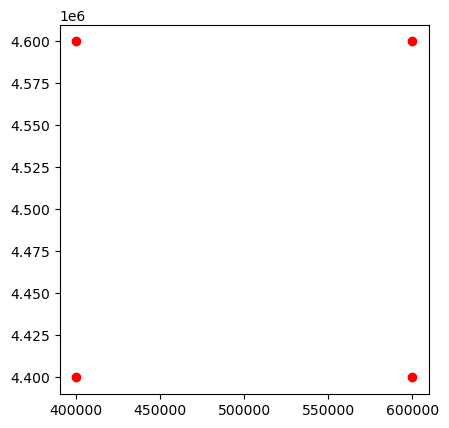

In [7]:
fig, ax = plt.subplots()
gdf.plot(ax=ax, color='red')

In [8]:
gdf['geometry']

0    POINT (600000.000 4400000.000)
1    POINT (400000.000 4600000.000)
2    POINT (600000.000 4600000.000)
0    POINT (400000.000 4400000.000)
Name: geometry, dtype: geometry

In [9]:
# Create sampling points
points = [Point(400000, 4400000), Point(600000, 4400000), Point(400000, 4600000), Point(600000, 4600000)]
gdf = geopandas.GeoDataFrame([1, 2, 3, 4], geometry=points, crs=32630)

In [10]:
currents.bounds

BoundingBox(left=-91913.6706, bottom=4255261.1754, right=788051.388, top=5026667.5409)

<AxesSubplot:>

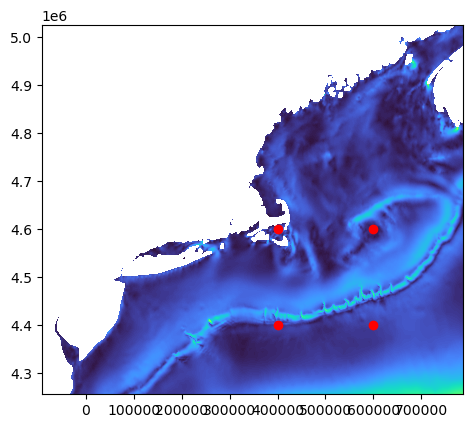

In [11]:
fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent=[currents.bounds[0], currents.bounds[2], currents.bounds[1], currents.bounds[3]]
ax = rasterio.plot.show(currents, extent=extent, ax=ax, cmap='turbo')

gdf.plot(ax=ax, color='red')

In [12]:
coord_list = [(x,y) for x,y in zip(gdf['geometry'].x , gdf['geometry'].y)]
gdf['value'] = [x for x in currents.sample(coord_list)]
gdf.head()

,0,geometry,value
0,1,POINT (400000.000 4400000.000),"[0.0742688, 181.08922]"
1,2,POINT (600000.000 4400000.000),"[0.070704386, 81.71301]"
2,3,POINT (400000.000 4600000.000),"[0.08844339, 73.10852]"
3,4,POINT (600000.000 4600000.000),"[0.04151321, 44.972664]"


# Notes
* Search for region meeting limits
* Look into conferences for GIS and MSP, next spring or summer
* Arezoo is working on abstract for ISOPE
* Code in modules.py to import local conditions
* add latitude and longitude as design variables to query environmental conditions